In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Retina display
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [2]:
from tueplots import bundles
plt.rcParams.update(bundles.beamer_moml())


# Also add despine to the bundle using rcParams
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

# Increase font size to match Beamer template
plt.rcParams['font.size'] = 16
# Make background transparent
plt.rcParams['figure.facecolor'] = 'none'

In [48]:
def approximate_pi(num_samples, rng):
    torch.manual_seed(rng)
    points = torch.rand(num_samples, 2)
    inside_circle = torch.sum(torch.norm(points, dim=1) <= 1)
    pi_estimate = (inside_circle / num_samples) * 4
    return pi_estimate.item()

In [49]:
num_samples = 5000
num_runs = 100

num_samples_list = [10, 50, 100, 500, 1000, 5000]
pi_estimates = []
for i in range(num_runs):
    pi_estimates.append([approximate_pi(num_samples, i)
                        for num_samples in num_samples_list])
pi_estimates = np.array(pi_estimates)
pi_mean = np.mean(pi_estimates, axis=0)
pi_variance = np.var(pi_estimates, axis=0)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the foll

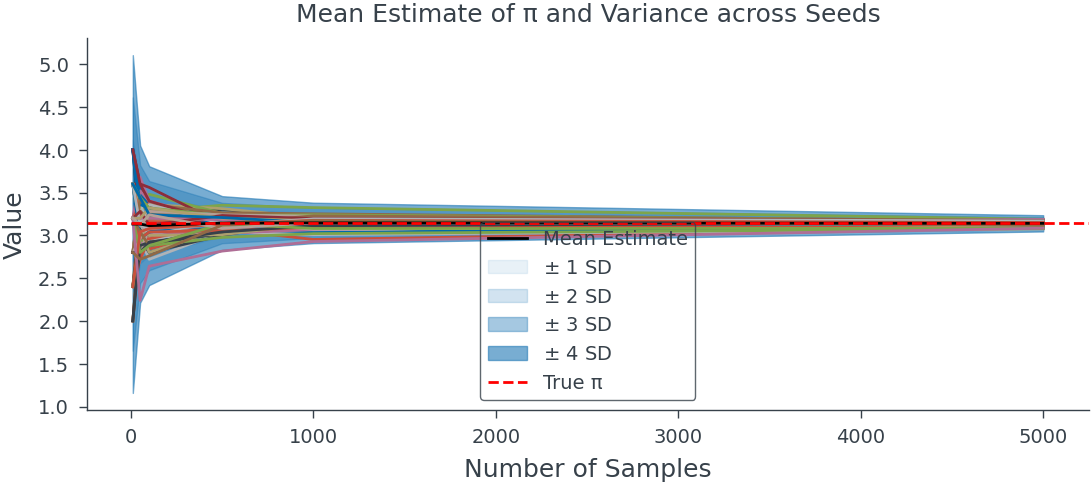

In [53]:
for i in range(num_runs):
    plt.plot(num_samples_list, pi_estimates[i])
plt.plot(num_samples_list, pi_mean, color='k', label='Mean Estimate')
plt.fill_between(num_samples_list, pi_mean - np.sqrt(pi_variance), pi_mean +
                 np.sqrt(pi_variance), color='tab:blue', alpha=0.1, label='$\pm$ 1 SD')
plt.fill_between(num_samples_list, pi_mean - 2 * np.sqrt(pi_variance), pi_mean +
                 2*np.sqrt(pi_variance), color='tab:blue', alpha=0.2, label='$\pm$ 2 SD')
plt.fill_between(num_samples_list, pi_mean - 3 * np.sqrt(pi_variance), pi_mean +
                 3*np.sqrt(pi_variance), color='tab:blue', alpha=0.4, label='$\pm$ 3 SD')
plt.fill_between(num_samples_list, pi_mean - 4 * np.sqrt(pi_variance), pi_mean +
                 4*np.sqrt(pi_variance), color='tab:blue', alpha=0.6, label='$\pm$ 4 SD')
plt.axhline(y=np.pi, color='r', linestyle='--', label='True π')
plt.xlabel('Number of Samples')
plt.ylabel('Value')
plt.title('Mean Estimate of π and Variance across Seeds')
plt.legend()

plt.tight_layout()
# plt.savefig('figures/sampling/prediction_var_mc_pi.pdf', transparent=True)